# Define the angles for the influence functions
@author: Max Felus

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [34]:
def zg(R,r):
    return -np.exp(-np.pi * (r**2/R**2))

def limit_line(H,R,x):
    return (H/R)*x - H

#function to define part of a circular line
def part_circ_line(xmin,xmax,r,n):
    x_circ = np.linspace(xmin,xmax,n)
    y_circ = []
    for i in range(len(x_circ)):
        try:
            y_circ.append(np.sqrt(r**2 - x_circ[i]**2))
        except RuntimeWarning:
            y_circ.append(0)
    return x_circ, np.array(y_circ)

In [7]:
H = 30
aor = np.deg2rad(35)
R = H/np.cos(aor)
n = 100
factor = 1.1


x_line = np.linspace(-R*factor,R*factor,n)


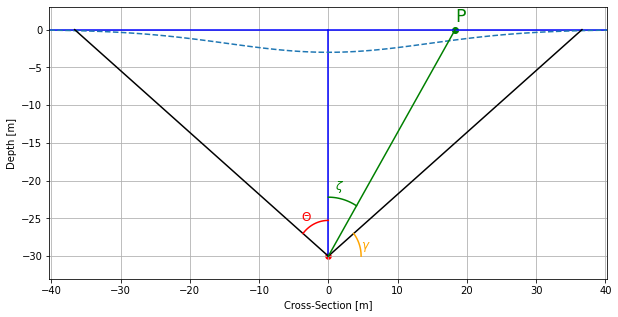

In [67]:
plt.figure(figsize=(10,5))

#ground line
plt.plot(x_line,[0 for _ in x_line],c='b')

# vertical
plt.plot([0,0],[-H,0],c='b')

#small subsidence line
plt.plot(x_line,(H/10)*zg(R,abs(x_line)),linestyle='dashed')

#cavity position
plt.scatter(0,-H,s=30,c='r')

#limit lines
plt.plot([0,-R],[-H,0],c='k')
plt.plot([0,R],[-H,0],c='k')

#point P
plt.scatter(R/2,0,c='g',label='Point P')
plt.plot([R/2,0],[0,-H],c='g')
plt.text(R/2,1,'P',c='g',fontsize='xx-large')

#Limit angle
x_angle = R/10
y_angle = limit_line(H,R,x_angle)
r_angle = np.sqrt(x_angle**2 + (y_angle+H)**2)

x_circ, y_circ = part_circ_line(x_angle,r_angle,r_angle,100)

plt.plot(x_circ,y_circ-H,c='orange')
plt.text(x_angle+(H/30),-H+(H/30),'$\gamma$',c='orange',fontsize='large')

#zone angle
xmin = 0
xmax = R/9
y_zone = limit_line(H,R/2,xmax)
r_zone = np.sqrt(xmax**2 + (y_zone+H)**2)

x_circ, y_circ = part_circ_line(xmin,xmax,r_zone,100)

plt.plot(x_circ,y_circ-H,c='g')
plt.text(H/30,-H+r_zone+(H/30),'$\zeta$',c='g',fontsize='large')

#angle of draw
x_angle = R/10
y_angle = limit_line(H,R,x_angle)
r_angle = np.sqrt(x_angle**2 + (y_angle+H)**2)

x_circ, y_circ = part_circ_line(-x_angle,0,r_angle,100)

plt.plot(x_circ,y_circ-H,c='r')
plt.text(-4*(H/30),-H+r_angle,'$\Theta$',c='r',fontsize='large')

#figure parameters
plt.xlabel('Cross-Section [m]')
plt.ylabel('Depth [m]')
plt.ylim([-H*1.1,H/10])
plt.xlim([-R*factor,R*factor])
plt.grid(True);

-27.0 3.6623237662843677 57.11753334457898
